<a href="https://colab.research.google.com/github/Sergeant69/loan-prediction-model/blob/main/Anirudh_final_project_sba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
open("SBAnational.csv")

<_io.TextIOWrapper name='SBAnational.csv' mode='r' encoding='UTF-8'>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


Importing the Dataset

In [5]:
df = pd.read_csv('SBAnational.csv')
df_copy = df.copy()
df


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114203,1835203003,RONALD LISS,WILMINGTON,MA,2165,BAY COLONY DEVEL CORP,MA,0,6-Mar-84,1984,...,N,N,NaN,9-May-84,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$500,000.00"
114204,1835204010,HENNING ENTERPRISES,NORTH BEACH HAVEN,NJ,8008,"TD BANK, NATIONAL ASSOCIATION",NJ,713940,10-Feb-98,1998,...,0,N,NaN,31-Aug-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
114205,1835205006,"J & A Auto Repair, L.C.",HARRISONBURG,VA,22802,BANK OF AMERICA NATL ASSOC,NC,811118,23-May-06,2006,...,Y,N,12-Jul-10,31-May-06,"$14,998.00",$0.00,CHGOFF,"$9,823.00","$10,000.00","$5,000.00"
114206,1835215009,"High Tek Systems, Inc.",MONTEBELLO,CA,90640,BANK OF AMERICA NATL ASSOC,NC,561720,23-May-06,2006,...,Y,N,24-Aug-10,31-May-06,"$95,500.00",$0.00,CHGOFF,"$47,000.00","$50,000.00","$25,000.00"


Data Pre-processing

In [7]:
#Understanding the dataset and it's features and pre-processing it according to the required dataframe for model training purposes.

In [8]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114208 entries, 0 to 114207
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      114208 non-null  int64 
 1   Name               114201 non-null  object
 2   City               114207 non-null  object
 3   State              114206 non-null  object
 4   Zip                114208 non-null  int64 
 5   Bank               114083 non-null  object
 6   BankState          114083 non-null  object
 7   NAICS              114208 non-null  int64 
 8   ApprovalDate       114208 non-null  object
 9   ApprovalFY         114208 non-null  int64 
 10  Term               114208 non-null  int64 
 11  NoEmp              114208 non-null  int64 
 12  NewExist           114208 non-null  int64 
 13  CreateJob          114208 non-null  int64 
 14  RetainedJob        114208 non-null  int64 
 15  FranchiseCode      114208 non-null  int64 
 16  UrbanRural         1

In [10]:
df.shape

(114208, 27)

In [11]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,1.142080e+05,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000,114208.000000
mean,1.426835e+09,49098.049786,401977.978163,2002.149280,92.480877,9.556353,1.316011,1.173184,3.602112,1703.538027,0.771032
std,2.434238e+08,31210.933018,256511.648147,5.164958,68.754656,89.656363,0.467005,11.023190,31.156319,10099.856004,0.636511
min,1.000014e+09,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.214556e+09,20011.000000,236118.000000,1998.000000,58.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.434910e+09,46227.000000,447110.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.638270e+09,78758.000000,561612.000000,2006.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000
max,1.835223e+09,99999.000000,928120.000000,2006.000000,461.000000,9999.000000,2.000000,3000.000000,9500.000000,91999.000000,2.000000


In [12]:
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     7
City                     1
State                    2
Zip                      0
Bank                   125
BankState              125
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr               17
LowDoc                   0
ChgOffDate           84728
DisbursementDate       177
DisbursementGross        0
BalanceGross             0
MIS_Status             770
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

In [13]:
#Here, we notice that there are significant number of null values in the dataframe, specifically the most in ChgOffDate column.

In [14]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [15]:
df.isnull().sum()

LoanNr_ChkDgt            0
Name                     0
City                     0
State                    0
Zip                      0
Bank                     0
BankState                0
NAICS                    0
ApprovalDate             0
ApprovalFY               0
Term                     0
NoEmp                    0
NewExist                 0
CreateJob                0
RetainedJob              0
FranchiseCode            0
UrbanRural               0
RevLineCr                0
LowDoc                   0
ChgOffDate           83904
DisbursementDate         0
DisbursementGross        0
BalanceGross             0
MIS_Status               0
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
dtype: int64

In [16]:
df.dtypes

LoanNr_ChkDgt         int64
Name                 object
City                 object
State                object
Zip                   int64
Bank                 object
BankState            object
NAICS                 int64
ApprovalDate         object
ApprovalFY            int64
Term                  int64
NoEmp                 int64
NewExist              int64
CreateJob             int64
RetainedJob           int64
FranchiseCode         int64
UrbanRural            int64
RevLineCr            object
LowDoc               object
ChgOffDate           object
DisbursementDate     object
DisbursementGross    object
BalanceGross         object
MIS_Status           object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
dtype: object

In [17]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [18]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [19]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    113179
Name: ApprovalFY, dtype: int64

In [20]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984])

In [21]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')

In [22]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    113179
Name: ApprovalFY, dtype: int64

In [23]:
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [24]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [25]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

In [26]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [27]:
df.dropna(subset = ['Industry'], inplace = True)

In [28]:
df.FranchiseCode.unique()

array([    1, 15100, 10656, 21425,  3490, 77175, 50949, 20550, 78760,
       84025, 10676, 10397, 23997, 51570, 70405, 81612, 36002, 16920,
       50564, 67759, 81965, 39598, 75982, 90725,  9802, 78325,   401,
       40472, 73675, 17998, 39700, 21420, 79140, 68021, 65925, 71456,
       10622,  8380, 44081,  6410, 52000, 83882, 10734, 38510, 77174,
       89769, 10556, 42520, 68020, 45455, 66910,  9800, 27765, 65140,
       85100, 64985, 53250, 75710, 50040, 62343, 35706, 52956, 55120,
       36680,  3515, 61400, 46413,  1350,  9050, 49952, 68150, 50028,
        4516, 84535, 35300, 56837, 45479, 46408, 20728, 10729, 10528,
       66690, 10691, 62753, 75900, 35705, 61900, 82360,  8047, 10200,
       68060, 34459, 15668, 19118, 90900, 67750, 43351, 65160, 70651,
        8015, 30210, 48450,  8045, 43579, 10605, 46885, 67550, 17750,
        9202, 20487,     0, 65150, 35635, 55512, 30233, 65145, 70554,
       10465,  1493, 36260, 56885, 10603, 50140, 59883, 52018, 48000,
       25650, 36355,

In [29]:
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

In [30]:
df.FranchiseCode

0         1
1         1
2         1
5         1
7         1
         ..
114200    0
114202    0
114204    1
114205    0
114206    0
Name: FranchiseCode, Length: 89295, dtype: int64

In [31]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [32]:
df.NewExist.unique()

array([2, 1])

In [33]:
df.RevLineCr.unique()

array(['N', 'Y', '0', 'T', '`', ','], dtype=object)

In [34]:
df.LowDoc.unique()

array(['Y', 'N', 'C'], dtype=object)

In [35]:
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

In [36]:
df.RevLineCr.unique()
df.LowDoc.unique()

array([1, 0])

In [37]:
df.MIS_Status.unique()

array(['P I F', 'CHGOFF'], dtype=object)

In [38]:
#Loan Status: Paid in Full, Charged Off

In [39]:
df.MIS_Status.value_counts()

P I F     54848
CHGOFF    21295
Name: MIS_Status, dtype: int64

In [40]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    54848
1    21295
Name: Default, dtype: int64

In [41]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [42]:
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [43]:
df.DaysToDisbursement.info()

<class 'pandas.core.series.Series'>
Int64Index: 76143 entries, 0 to 114206
Series name: DaysToDisbursement
Non-Null Count  Dtype          
--------------  -----          
76143 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.2 MB


In [44]:
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [45]:
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [46]:
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [47]:
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [48]:
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [49]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [50]:
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})

In [51]:
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [52]:
df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode',
                      'ChgOffDate', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [53]:
df.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64

In [54]:
df.shape

(76143, 21)

In [55]:
df.Term.unique().sum()

44983

In [56]:
df['RealEstate'] = np.where(df['Term'] >= 240, 1, 0)

In [57]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) |
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)


In [58]:
df.DisbursementFY.unique()

array([1999, 1997, 1998, 2006, 2001, 2002, 2000, 2004, 2003, 2005, 2009,
       2007, 2008, 1996, 2010, 1995, 2012, 2011])

In [59]:
df = df[df.DisbursementFY <= 2010]

In [60]:
df.shape

(76137, 23)

In [61]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession
count,76137,76137,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137,76137.000000,76137.000000,...,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000,76137.000000
unique,51,52,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8317,18264,NaN,NaN,NaN,NaN,NaN,54996,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.337274,73.251941,6.984449,1.166043,4.362399,NaN,0.471335,0.052524,...,0.018467,0.320265,0.279693,102.290056,2004.350329,0.265981,0.559543,0.580335,0.031732,0.852122
std,NaN,NaN,2.749402,44.988232,66.369782,7.212391,9.799555,NaN,0.499181,0.223082,...,0.134633,0.466581,0.448851,191.946262,2.715728,0.441857,0.126505,0.493507,0.175288,0.354982
min,NaN,NaN,1997.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,-567.000000,1995.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,NaN,NaN,2005.000000,48.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,26.000000,2005.000000,0.000000,0.500000,0.000000,0.000000,1.000000
50%,NaN,NaN,2005.000000,84.000000,3.000000,0.000000,2.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,42.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000
75%,NaN,NaN,2006.000000,84.000000,6.000000,1.000000,5.000000,NaN,1.000000,0.000000,...,0.000000,1.000000,1.000000,81.000000,2006.000000,1.000000,0.500000,1.000000,0.000000,1.000000


In [62]:
df['DisbursedGreaterAppv'] = np.where(df['DisbursementGross'] > df['GrAppv'], 1, 0)

In [63]:
df.DisbursedGreaterAppv.unique()

array([0, 1])

In [64]:
df = df[df['DaysToDisbursement'] >= 0]

df.shape

(76124, 24)

In [65]:
df.describe(include = ['int', 'float', 'object'])

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed,RealEstate,GreatRecession,DisbursedGreaterAppv
count,76124,76124,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124,76124.000000,76124.000000,...,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000,76124.000000
unique,51,52,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8317,18264,NaN,NaN,NaN,NaN,NaN,54996,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.338461,73.249304,6.983776,1.166242,4.363144,NaN,0.471415,0.052428,...,0.320293,0.279741,102.321712,2004.351624,0.265882,0.559506,0.580264,0.031738,0.852241,0.369424
std,NaN,NaN,2.748128,44.990788,66.375094,7.212991,9.800225,NaN,0.499186,0.222889,...,0.466592,0.448875,191.936029,2.714142,0.441805,0.126482,0.493519,0.175302,0.354863,0.482652
min,NaN,NaN,1997.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,1997.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2005.000000,48.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,26.000000,2005.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,2005.000000,84.000000,3.000000,0.000000,2.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,42.000000,2005.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2006.000000,84.000000,6.000000,1.000000,5.000000,NaN,1.000000,0.000000,...,1.000000,1.000000,81.000000,2006.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000


**Data Visualization**


Here, the plan is to find out the correlation among the columns, as well as find out the trends of the column, and how the dataframe behaves based on the time frame, particularly the fluctuation during the Great Recession.

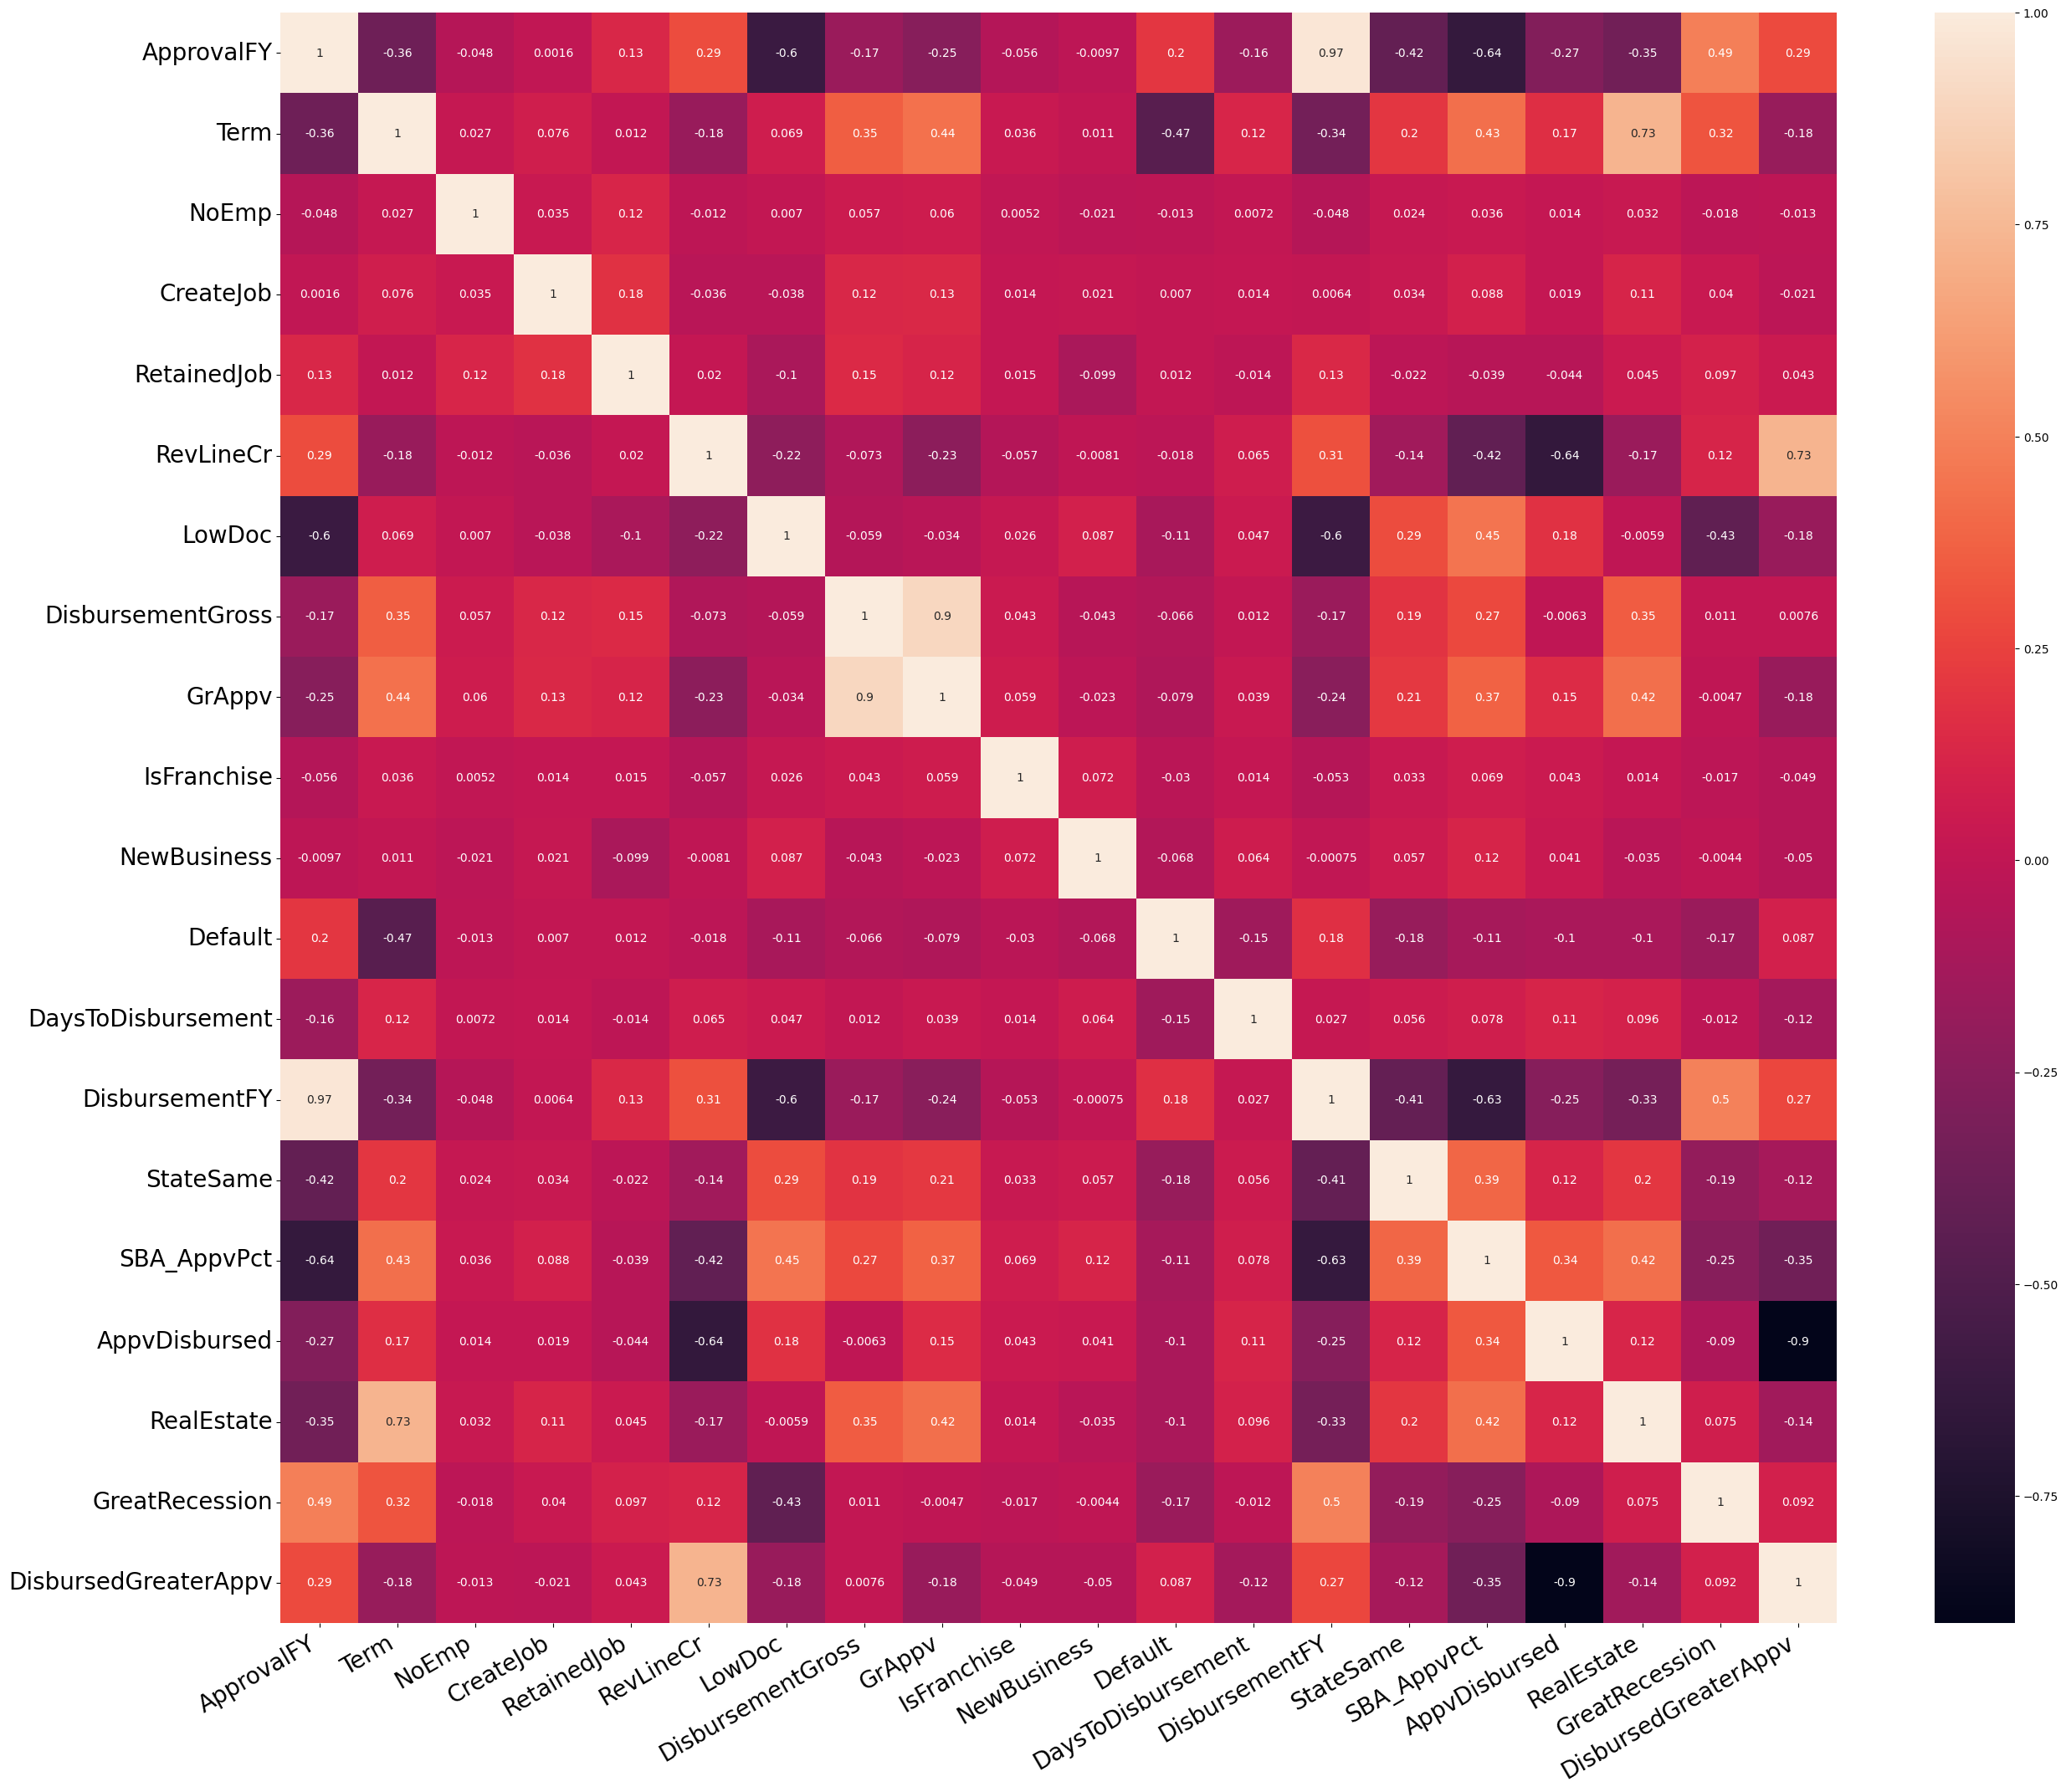

In [66]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

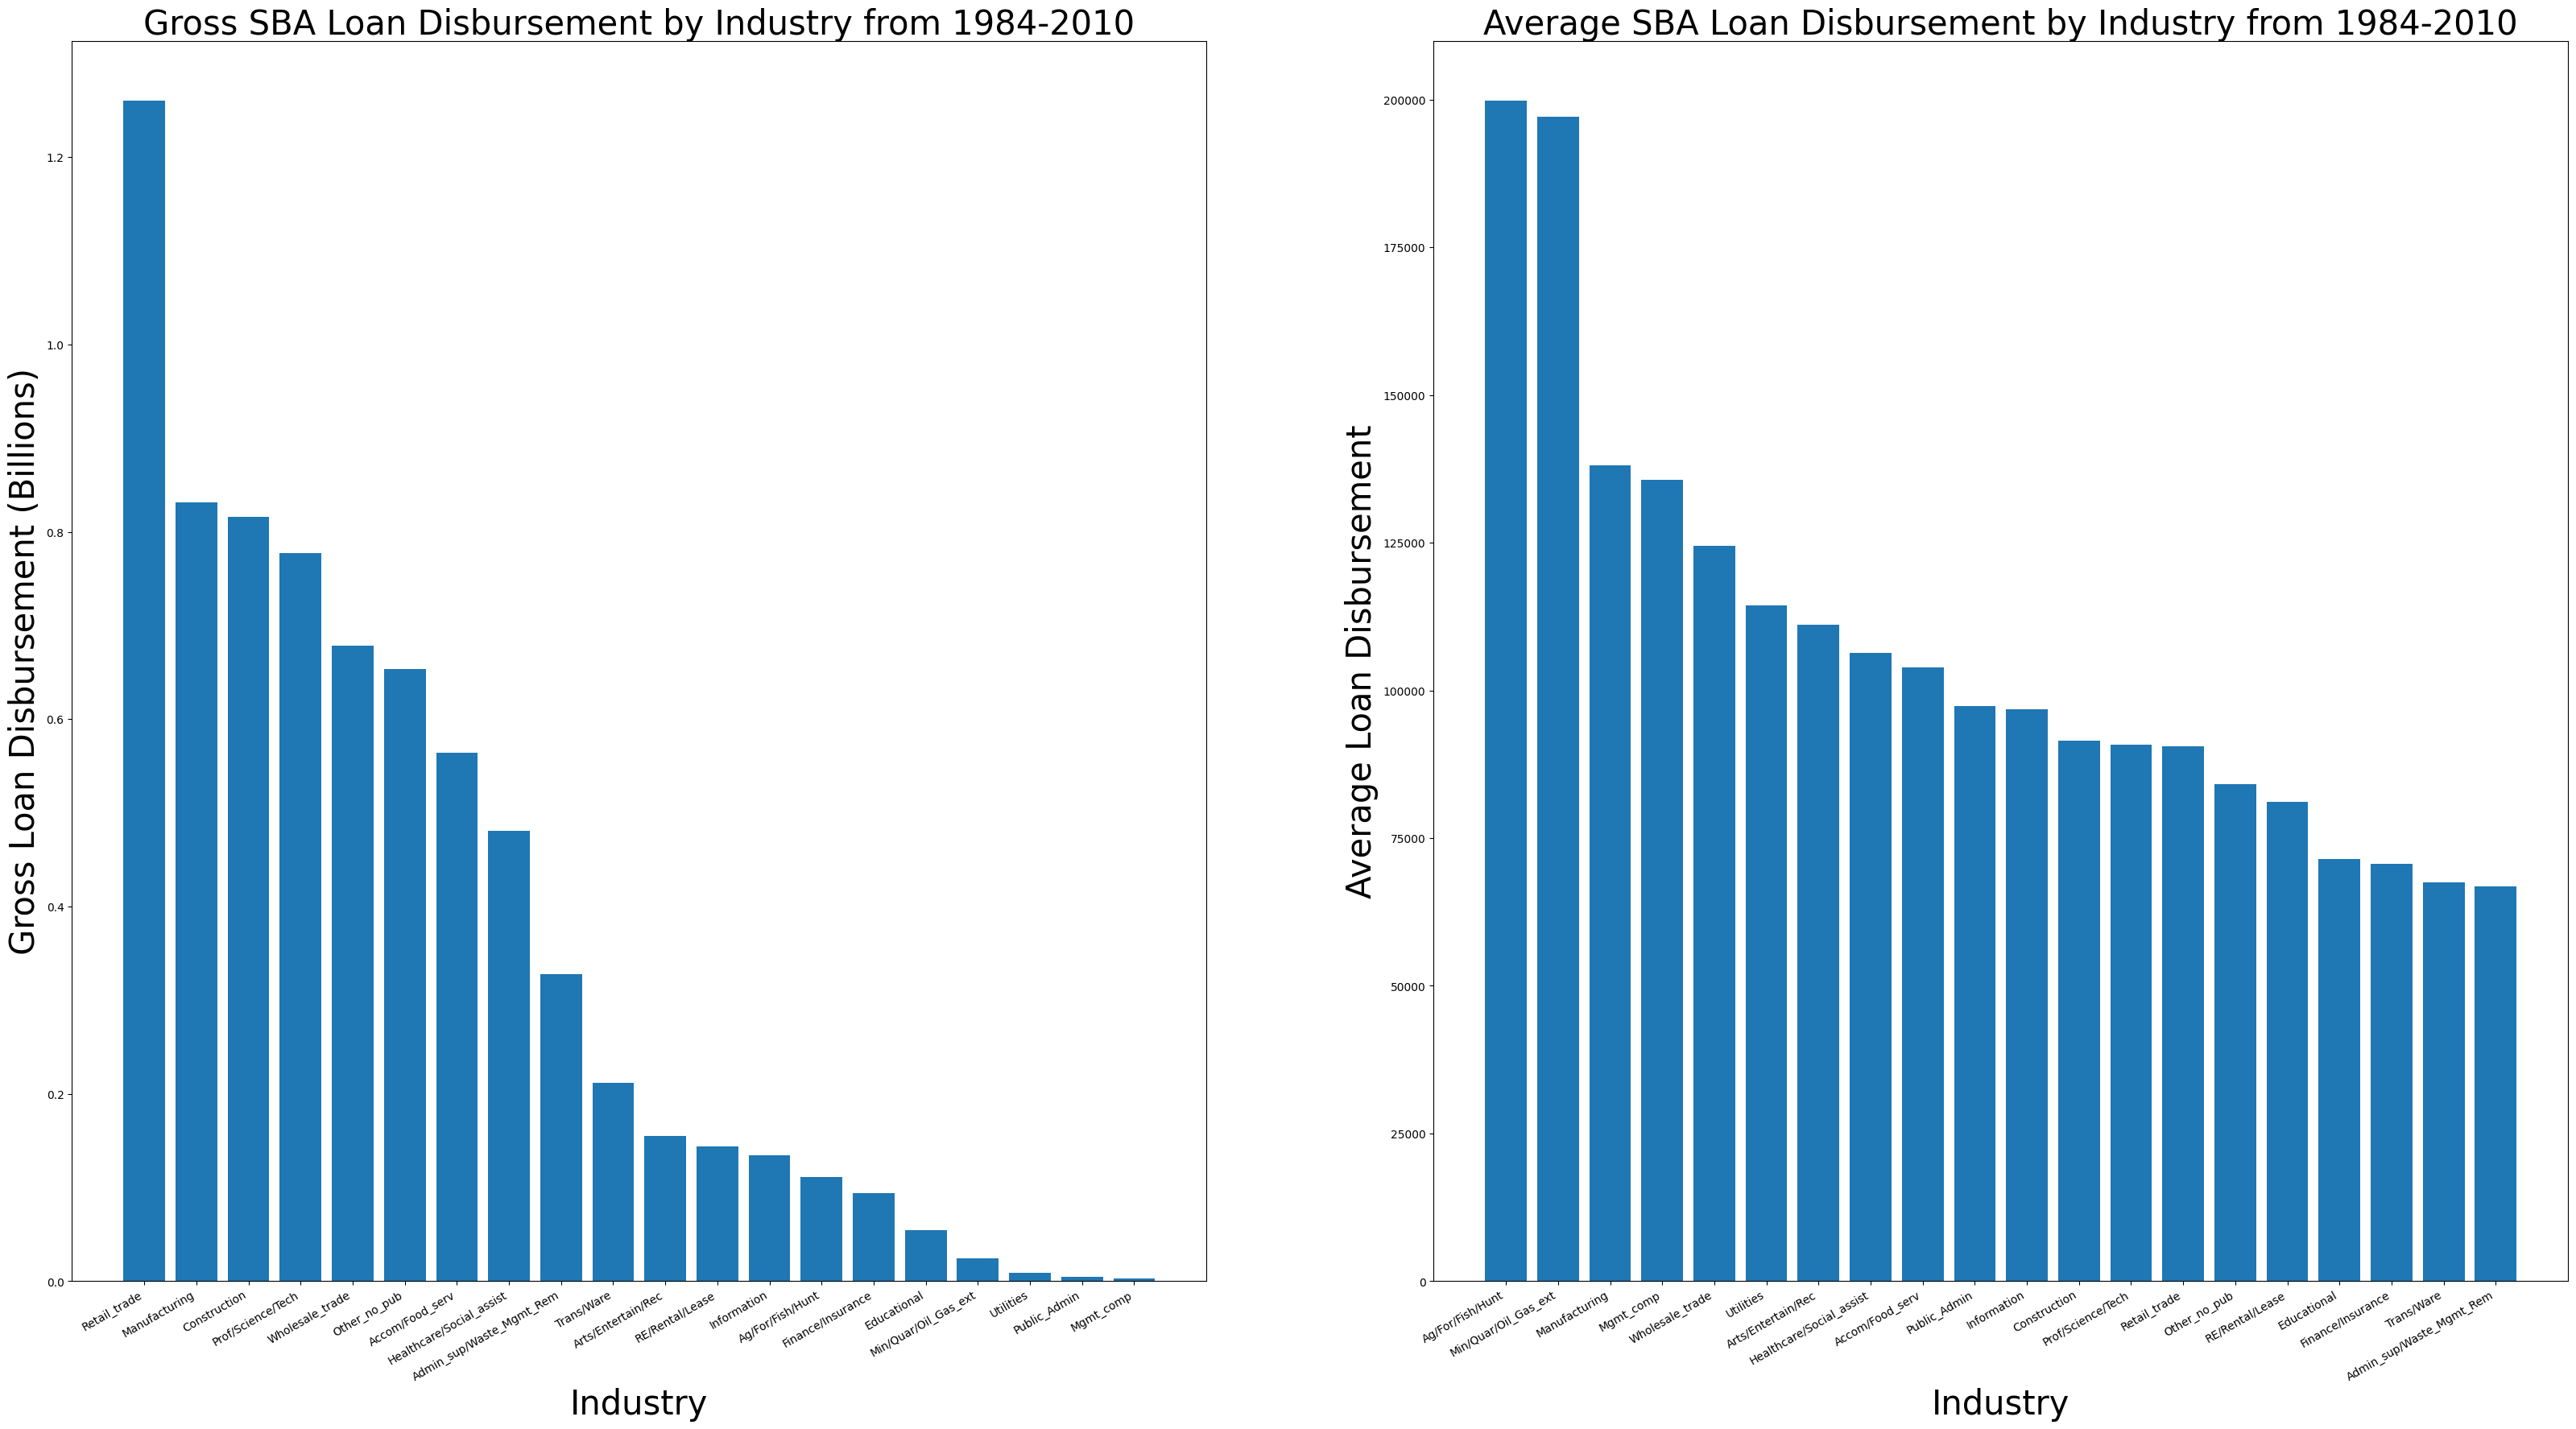

In [67]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax1.set_xlabel('Industry', fontsize = 30)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 30)

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=30)
ax2.set_xlabel('Industry',  fontsize = 30)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 30)


plt.show()

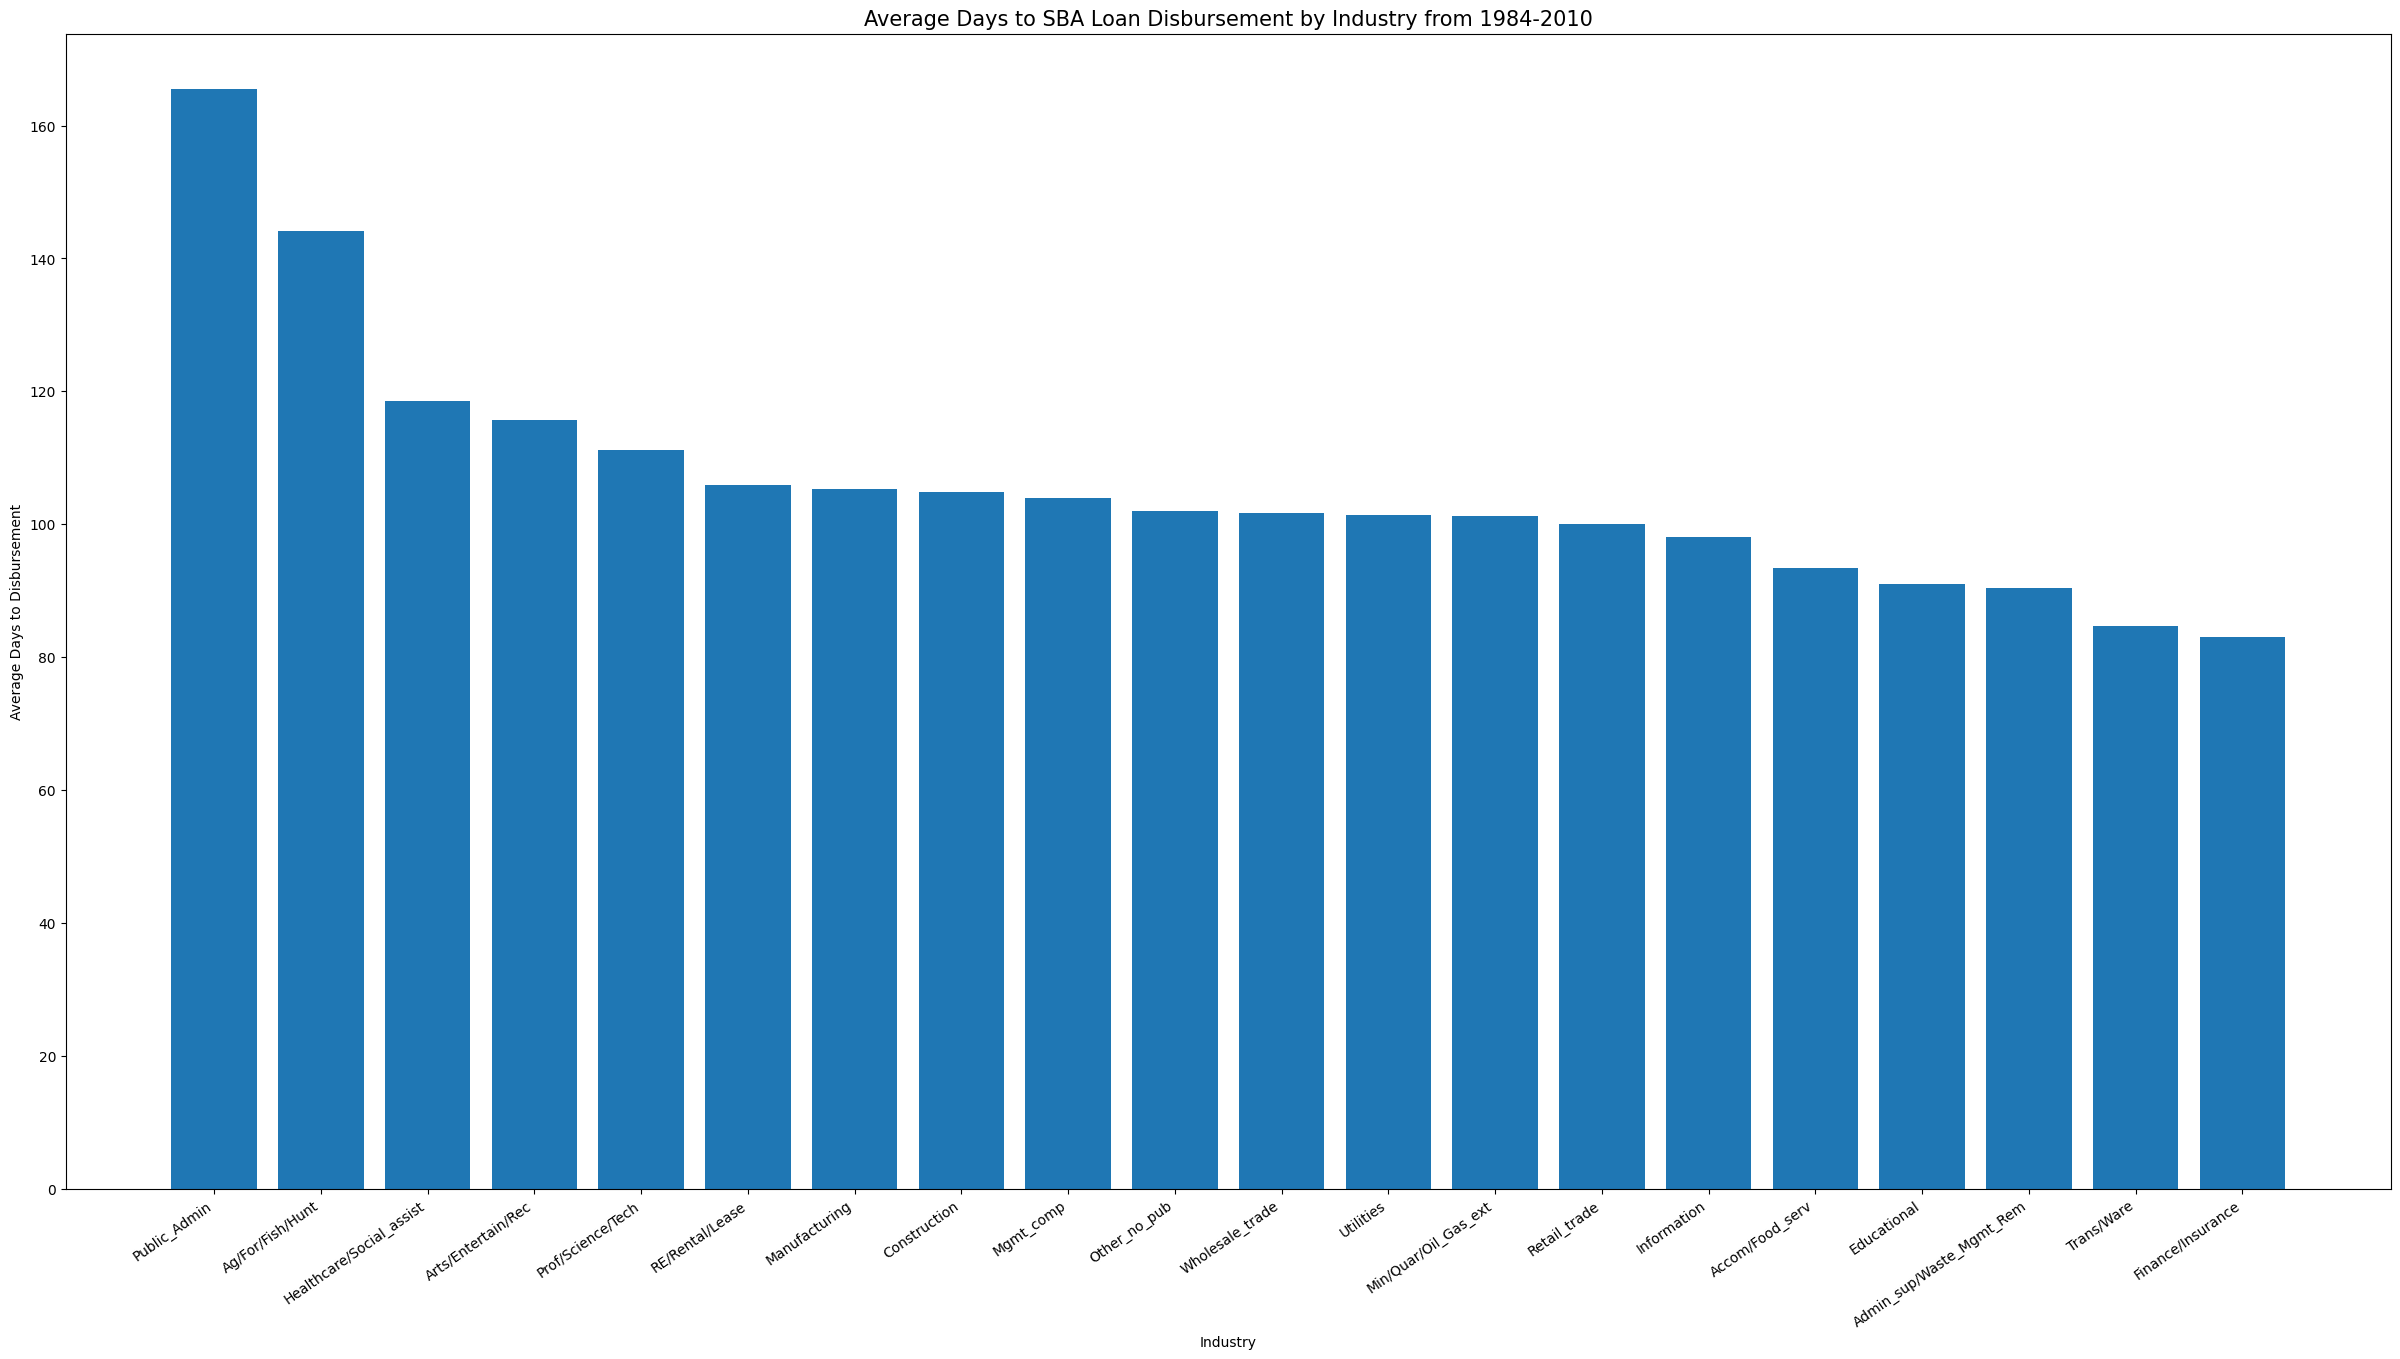

In [68]:
fig2, ax = plt.subplots(figsize = (30,15))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

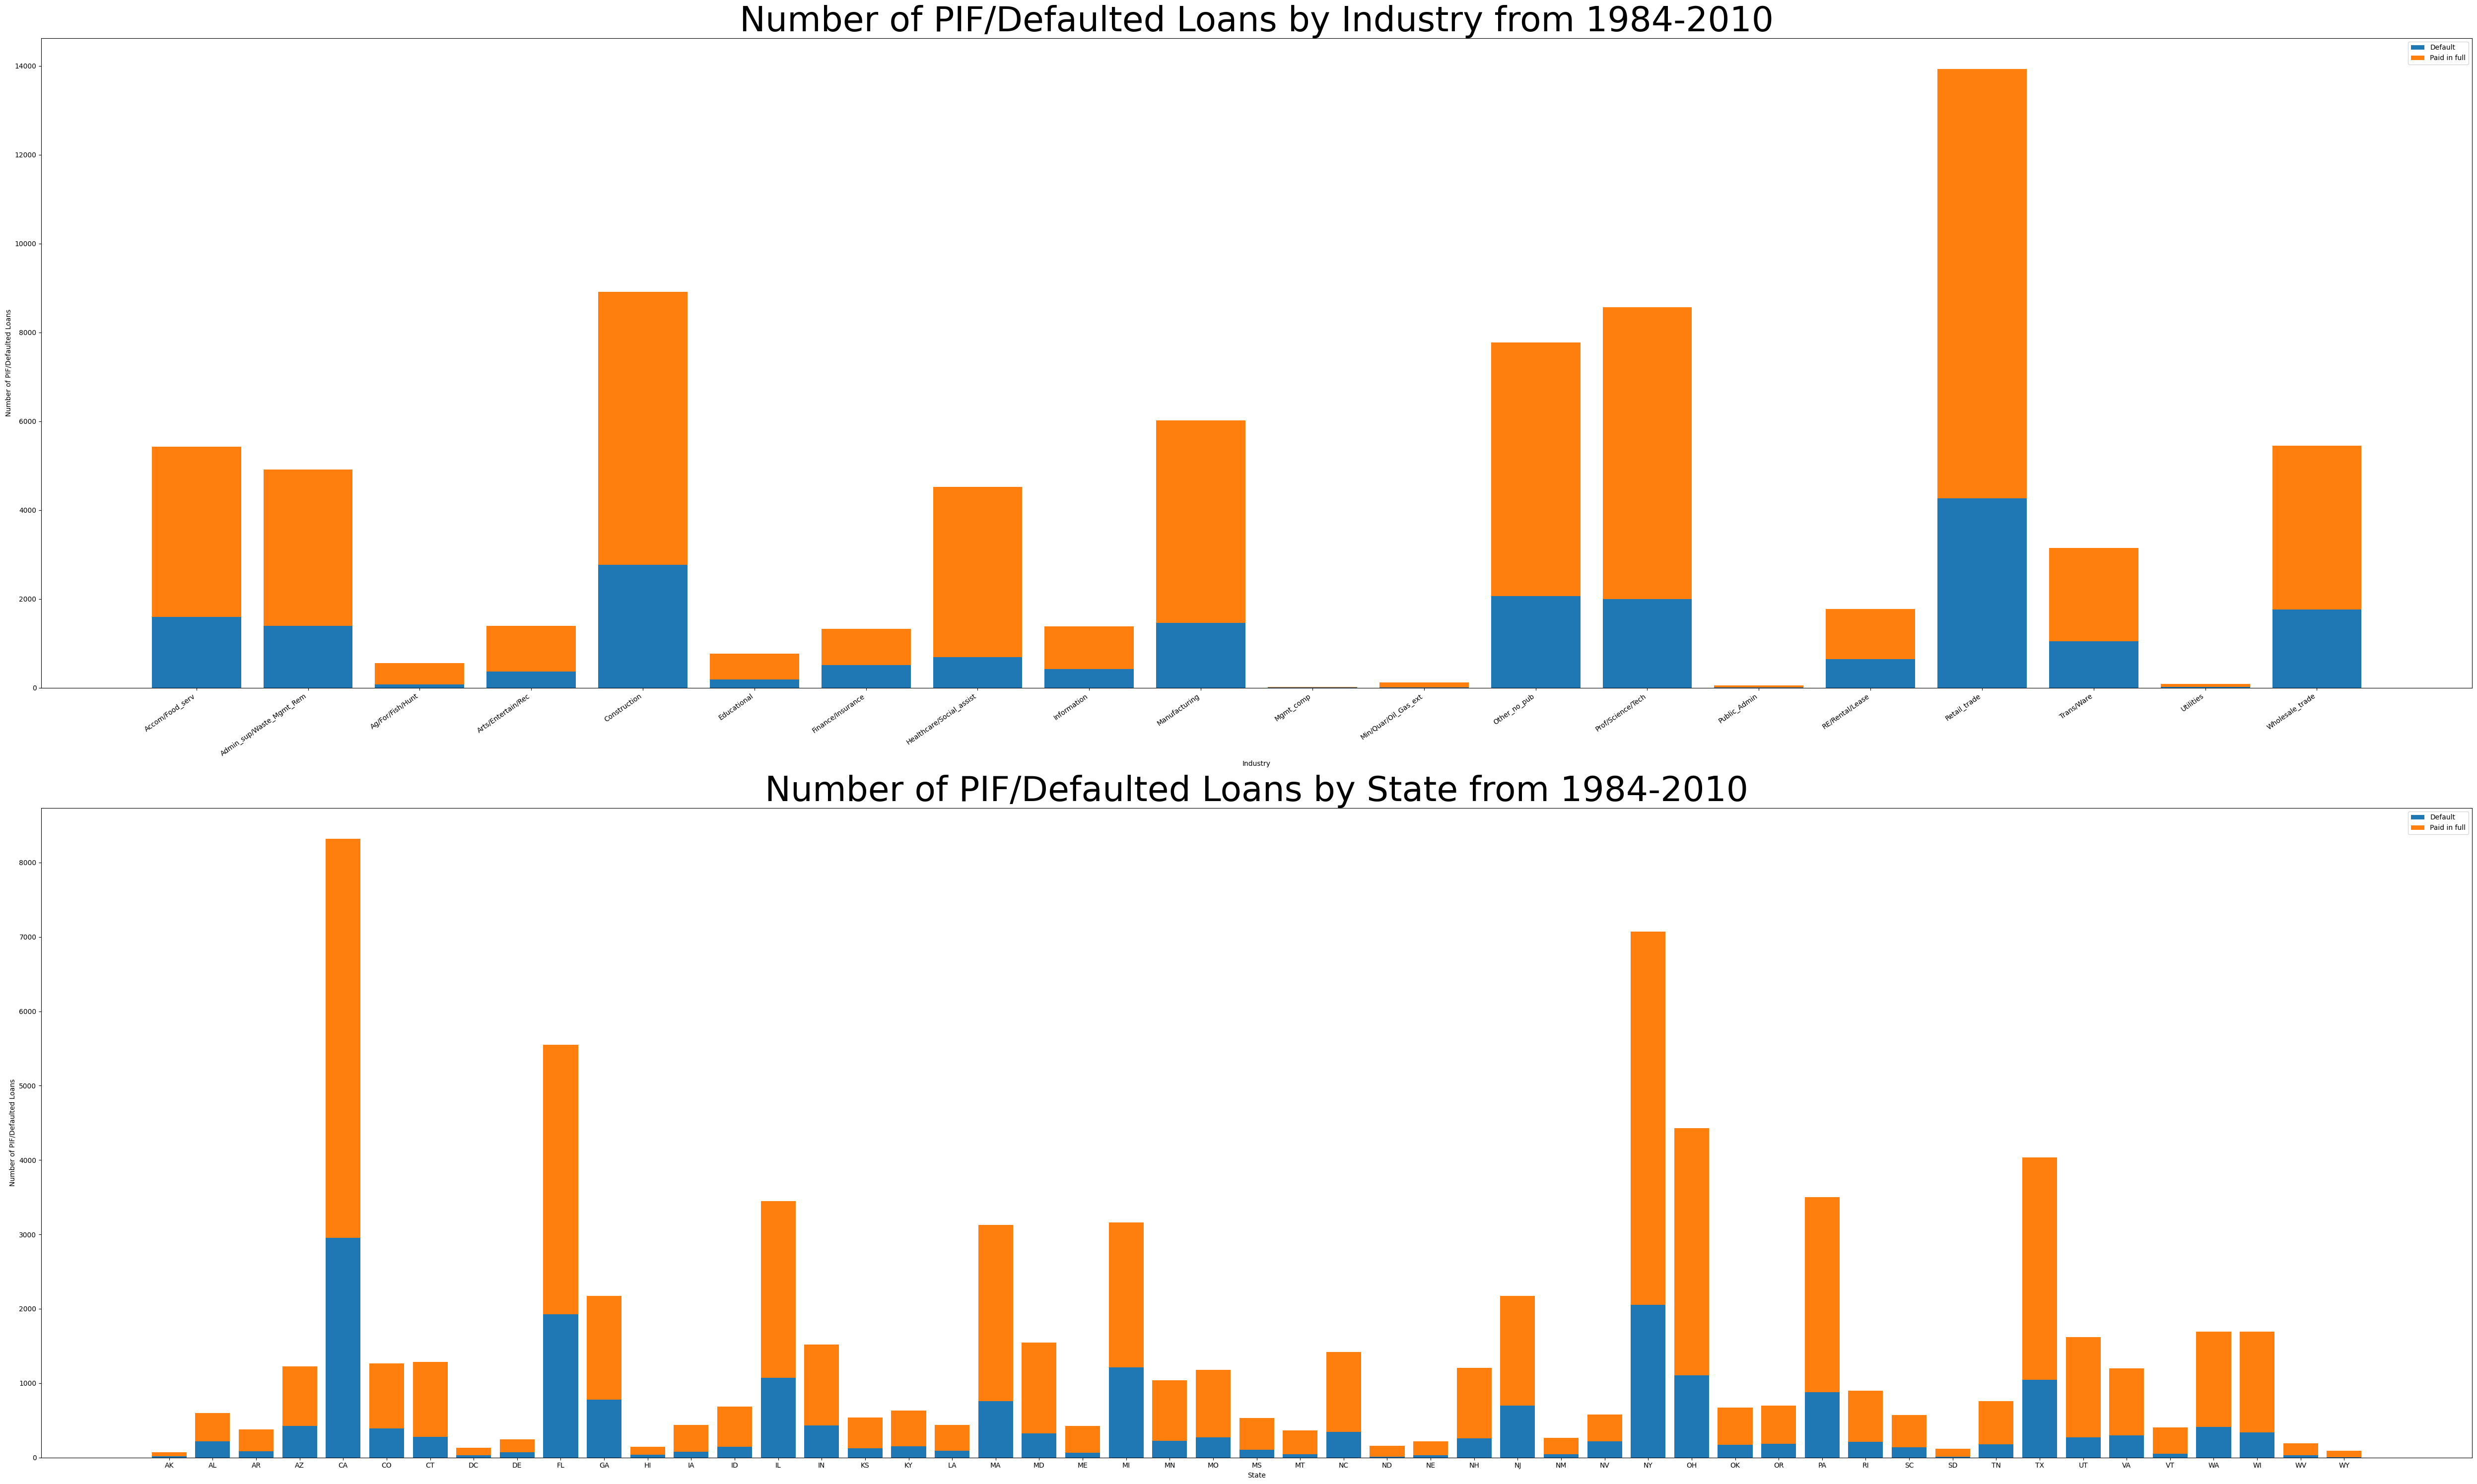

In [69]:
fig3 = plt.figure(figsize=(50, 30))

ax1a = plt.subplot(2,1,1)
ax2a = plt.subplot(2,1,2)

def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=50)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize= 50)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [70]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])

def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,3835,1594,0.293608
Admin_sup/Waste_Mgmt_Rem,3515,1393,0.283822
Ag/For/Fish/Hunt,482,75,0.134650
Arts/Entertain/Rec,1034,363,0.259843
Construction,6146,2770,0.310677
Educational,576,192,0.250000
Finance/Insurance,820,507,0.382065
Healthcare/Social_assist,3833,685,0.151616
Information,967,419,0.302309


In [71]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])

def_state

Default,0,1,Def_Percent
State,,,
AK,59,15,0.202703
AL,381,219,0.365000
AR,295,83,0.219577
AZ,801,428,0.348251
CA,5365,2952,0.354936
CO,878,391,0.308117
CT,1006,277,0.215900
DC,101,30,0.229008
DE,169,73,0.301653


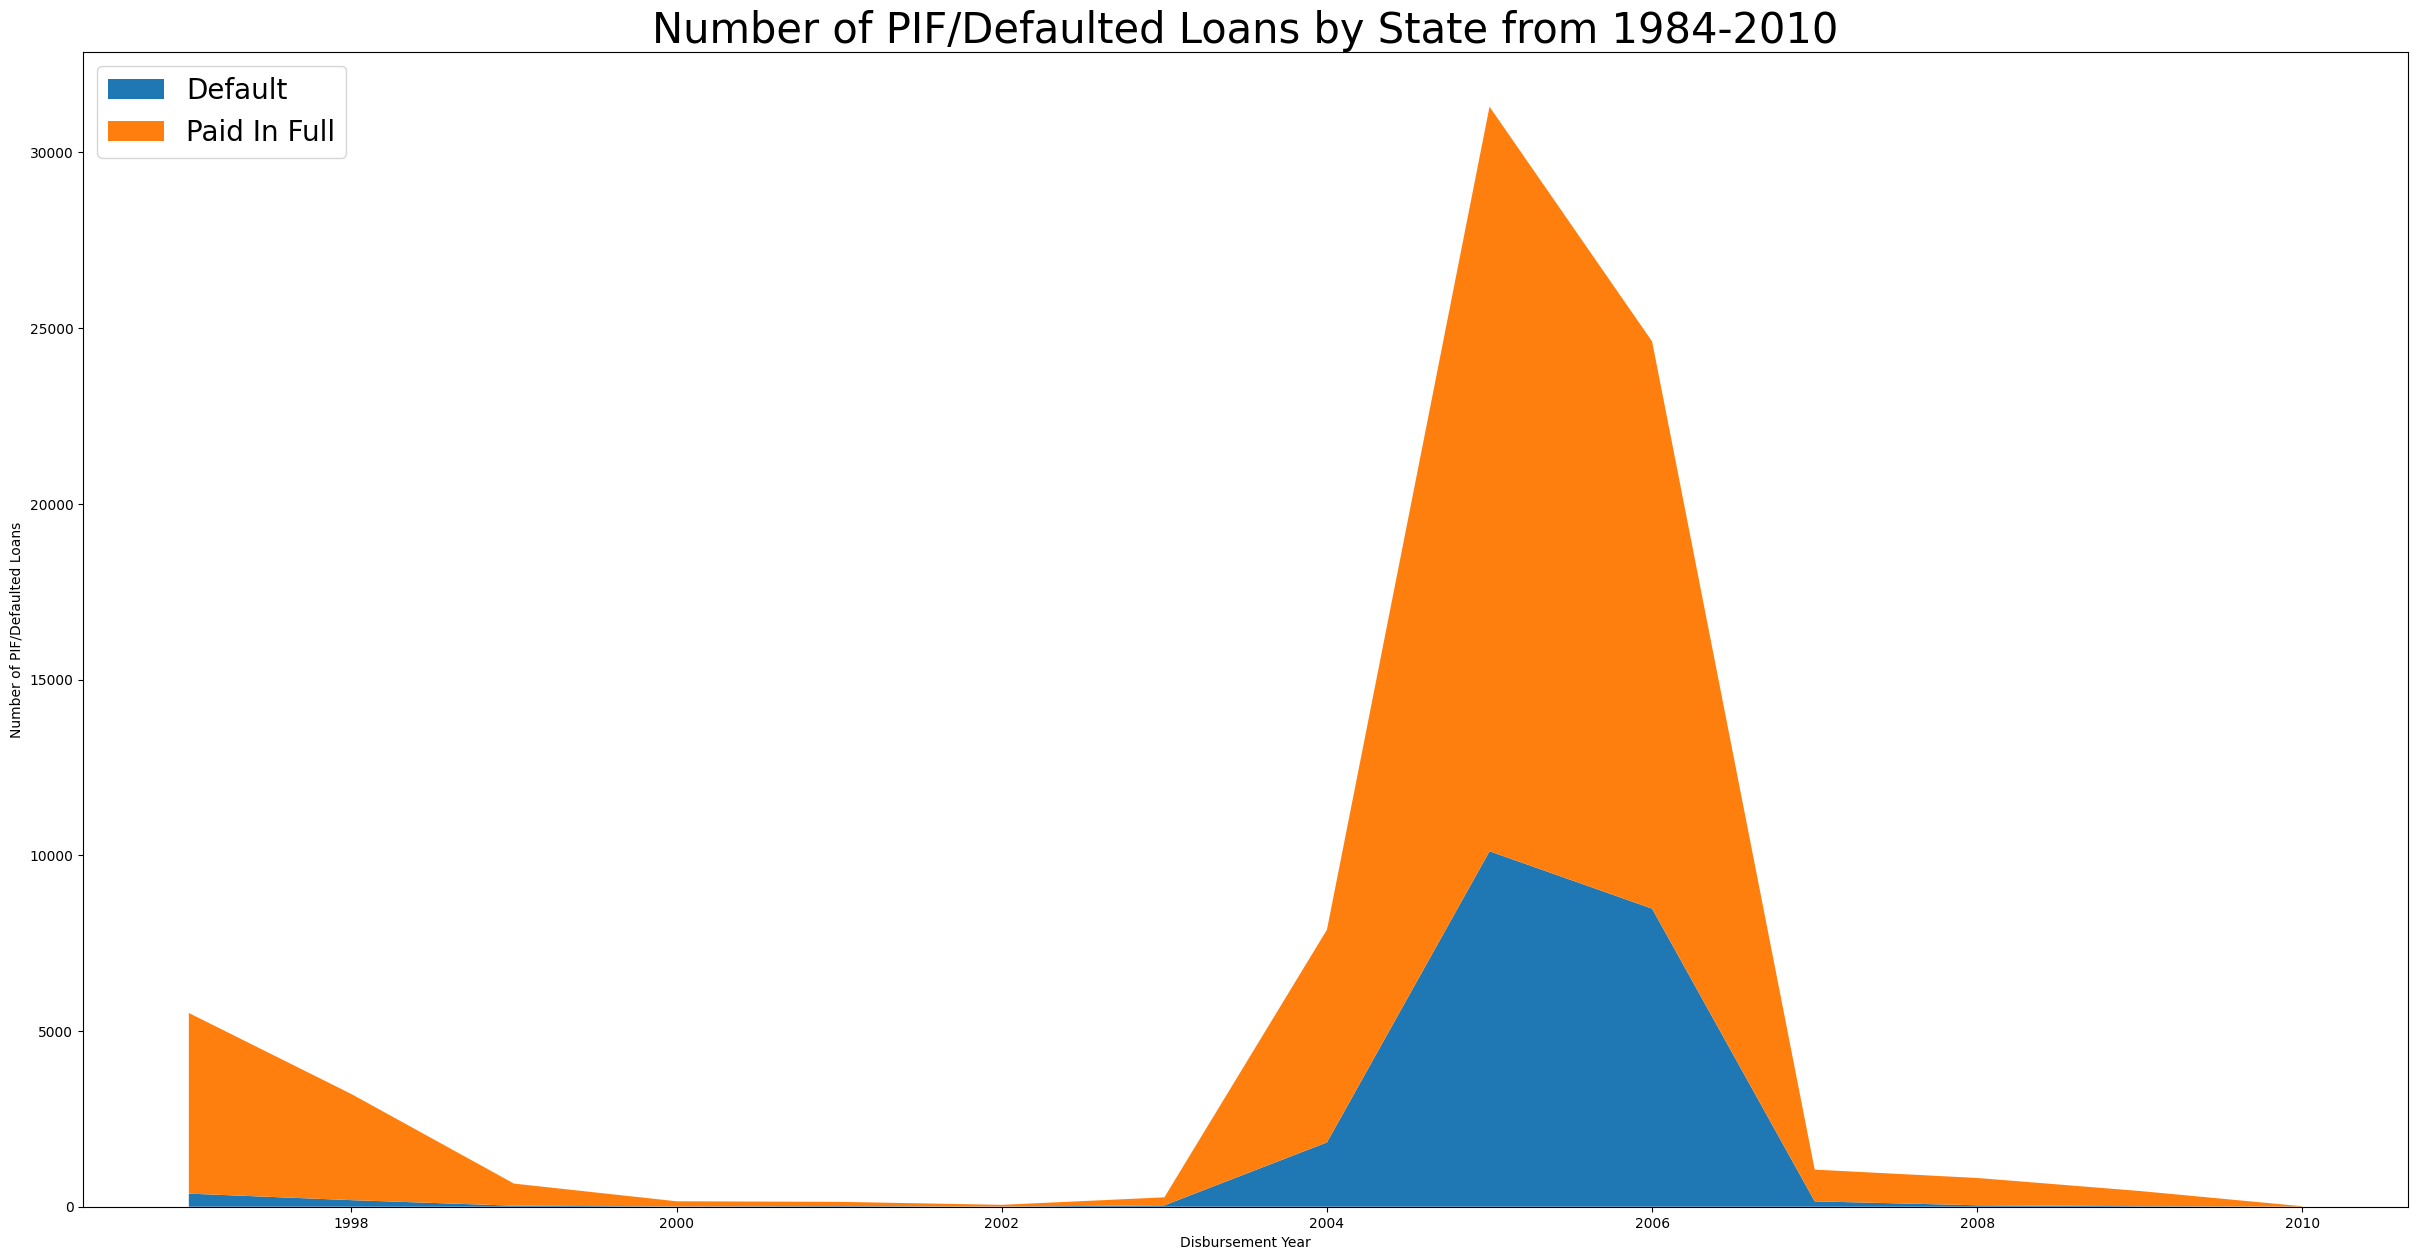

In [72]:
fig4, ax4 = plt.subplots(figsize = (30,15))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')

x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels = ['Default', 'Paid In Full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize = 30)

ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left', fontsize = 20)

plt.show()

## Model Training and Testing

Here, the plan is to one hot encode the dataframe, Normalise the dataframe by scaling it and spliting the dataset into training and testing dataframes, and train the model on the training dataset and test it on the testing and comparing the prediction and the testing target column using various metrics to find out the best possible model for the dataset.



In [73]:
df = pd.get_dummies(df)

df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
y = df['Default']
X = df.drop('Default', axis = 1)

In [75]:
scale = StandardScaler()
X_scld = scale.fit_transform(X)

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_scld, y, test_size=0.25)

In [77]:
#logistic Regression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.917     0.949     0.933     13717
           1      0.855     0.780     0.815      5314

    accuracy                          0.901     19031
   macro avg      0.886     0.864     0.874     19031
weighted avg      0.900     0.901     0.900     19031



In [78]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
model_dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))



              precision    recall  f1-score   support

           0      0.955     0.951     0.953     13717
           1      0.875     0.885     0.880      5314

    accuracy                          0.933     19031
   macro avg      0.915     0.918     0.917     19031
weighted avg      0.933     0.933     0.933     19031



In [80]:
print("Testing accuracy is:",accuracy_score(y_val, y_pred))

Testing accuracy is: 0.9325836792601545


In [81]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.958     0.970     0.964     13717
           1      0.920     0.890     0.905      5314

    accuracy                          0.948     19031
   macro avg      0.939     0.930     0.934     19031
weighted avg      0.947     0.948     0.947     19031



In [82]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_val)

print(classification_report(y_val, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.891     0.273     0.417     13717
           1      0.327     0.914     0.482      5314

    accuracy                          0.452     19031
   macro avg      0.609     0.593     0.450     19031
weighted avg      0.733     0.452     0.435     19031



In [84]:
print("Testing Accuracy is: ", accuracy_score(y_val, y_pred))

Testing Accuracy is:  0.45157900267983814


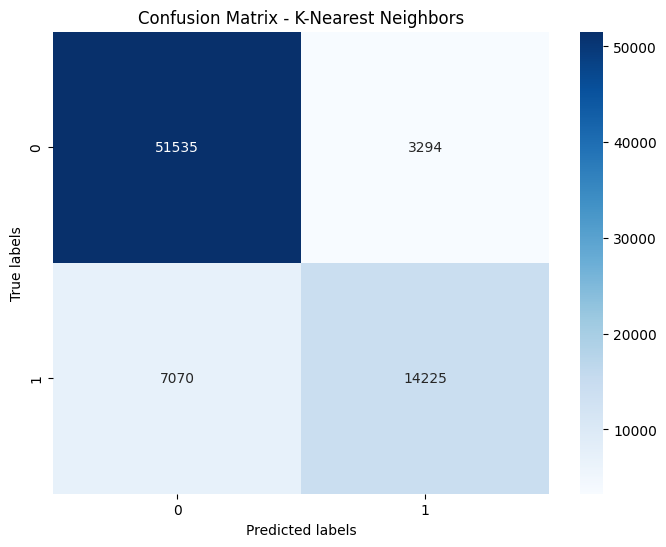

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have your data and labels stored in X and y, respectively

# Fit the KNN model
model = KNeighborsClassifier()
model.fit(X, y)

# Obtain predicted class labels
y_pred = model.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

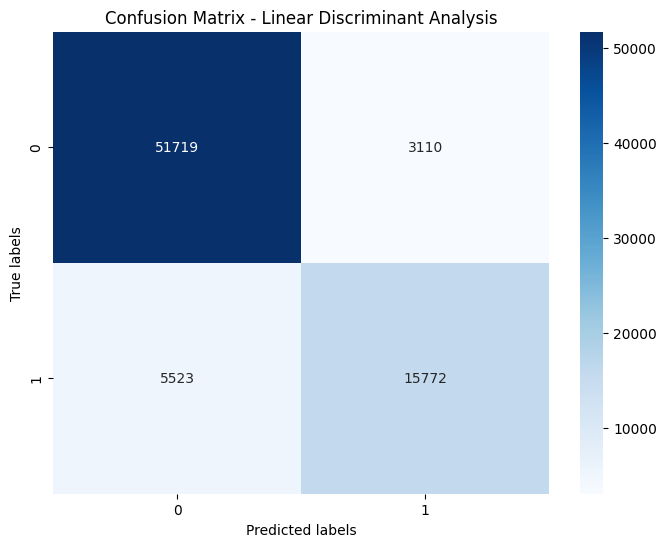

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

# Assuming you have your data and labels stored in X and y, respectively

# Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

# Obtain predicted class labels
y_pred = model.predict(X)

# Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Discriminant Analysis")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In conclusion, we get the best result from the Random Forest Classifier with an accuracy score of 94.6 on the testing dataframe.

With this project, I got to learn about the Loan Approval Process for Small Business Administration (SBA), as well about the entire process from taking the loan to disbursement of it, based on the different sectors of business. Also understood the effect of Great Recession on the Disbursement of the loans during that period, and it's effect on taking loans.

In [88]:
import joblib
model = RandomForestClassifier()
model.fit(X_train,y_train)

#save the model to disk
joblib.dump(model, "SBA_Loan_Model")    # wb= write binary

print("Model dumped successfully into a file by Joblib!\n")

print("done!")

Model dumped successfully into a file by Joblib!

done!


In [ ]:
#to check the collab file please vist : https://colab.research.google.com/drive/1FtHAI5VjPjFfAfhgW_o5LxdZQIvFbc91?usp=sharing